In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import os

# Set up matplotlib for better display
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = False

## 1. Sobel Edge Detection on Traffic Signs


In [2]:
# Load traffic signs image
traffic_img = cv2.imread('img/1.png')
traffic_gray = cv2.cvtColor(traffic_img, cv2.COLOR_BGR2GRAY)

# User-defined Sobel function
def sobel_edge_detection(image):
    """
    User-defined Sobel edge detection function
    """
    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Apply convolution
    grad_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
    
    # Calculate magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return grad_x, grad_y, magnitude

# Apply user-defined Sobel
sobel_x_user, sobel_y_user, sobel_mag_user = sobel_edge_detection(traffic_gray)

# Apply built-in Sobel
sobel_x_builtin = cv2.Sobel(traffic_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_builtin = cv2.Sobel(traffic_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag_builtin = np.sqrt(sobel_x_builtin**2 + sobel_y_builtin**2)
sobel_mag_builtin = np.clip(sobel_mag_builtin, 0, 255).astype(np.uint8)

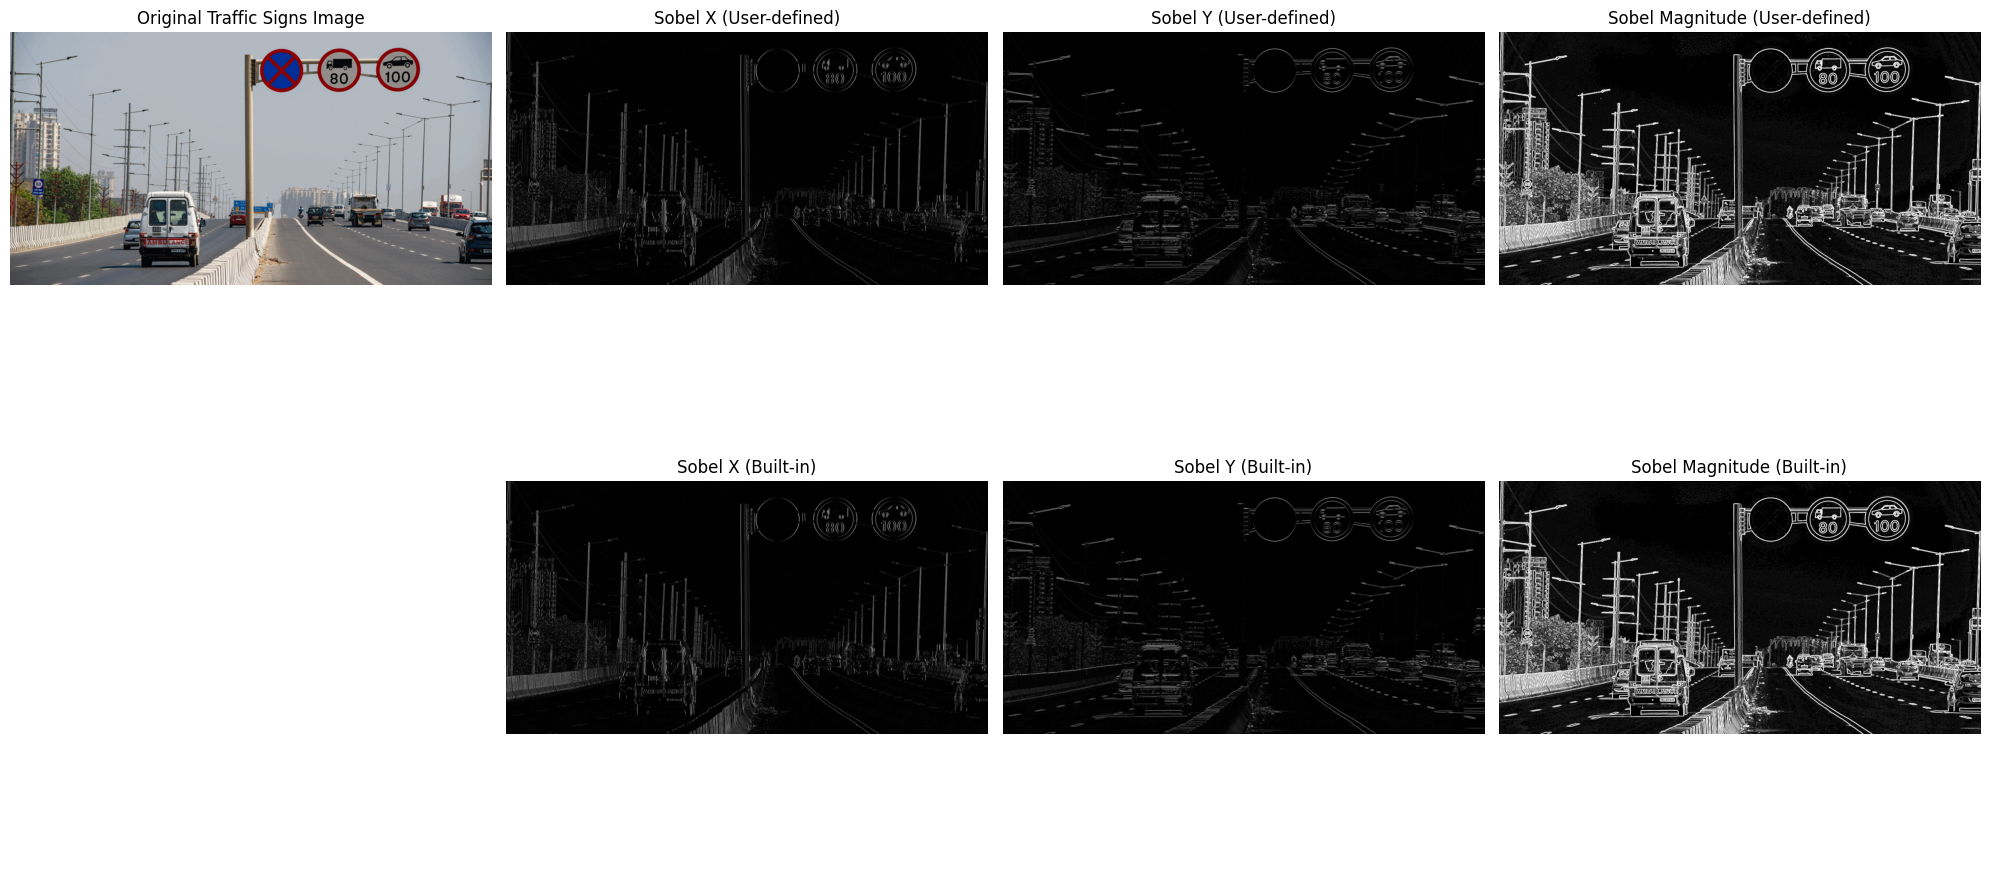

In [3]:
# Display Sobel results
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Original image
axes[0, 0].imshow(cv2.cvtColor(traffic_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Traffic Signs Image')
axes[0, 0].axis('off')

# User-defined Sobel results
axes[0, 1].imshow(np.abs(sobel_x_user), cmap='gray')
axes[0, 1].set_title('Sobel X (User-defined)')
axes[0, 1].axis('off')

axes[0, 2].imshow(np.abs(sobel_y_user), cmap='gray')
axes[0, 2].set_title('Sobel Y (User-defined)')
axes[0, 2].axis('off')

axes[0, 3].imshow(sobel_mag_user, cmap='gray')
axes[0, 3].set_title('Sobel Magnitude (User-defined)')
axes[0, 3].axis('off')

# Built-in Sobel results
axes[1, 1].imshow(np.abs(sobel_x_builtin), cmap='gray')
axes[1, 1].set_title('Sobel X (Built-in)')
axes[1, 1].axis('off')

axes[1, 2].imshow(np.abs(sobel_y_builtin), cmap='gray')
axes[1, 2].set_title('Sobel Y (Built-in)')
axes[1, 2].axis('off')

axes[1, 3].imshow(sobel_mag_builtin, cmap='gray')
axes[1, 3].set_title('Sobel Magnitude (Built-in)')
axes[1, 3].axis('off')

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()

## 2. Prewitt Edge Detection on X-ray Bone Fracture Images


In [4]:
# Load X-ray bone image
xray_img = cv2.imread('img/2.png', cv2.IMREAD_GRAYSCALE)

# User-defined Prewitt function
def prewitt_edge_detection(image):
    """
    User-defined Prewitt edge detection function
    """
    # Prewitt kernels
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    # Apply convolution
    grad_x = cv2.filter2D(image, cv2.CV_64F, prewitt_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, prewitt_y)
    
    # Calculate magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return grad_x, grad_y, magnitude

# Apply user-defined Prewitt
prewitt_x_user, prewitt_y_user, prewitt_mag_user = prewitt_edge_detection(xray_img)

# Built-in Prewitt using ndimage
from scipy.ndimage import prewitt
prewitt_x_builtin = prewitt(xray_img.astype(float), axis=1)
prewitt_y_builtin = prewitt(xray_img.astype(float), axis=0)
prewitt_mag_builtin = np.sqrt(prewitt_x_builtin**2 + prewitt_y_builtin**2)
prewitt_mag_builtin = np.clip(prewitt_mag_builtin, 0, 255).astype(np.uint8)

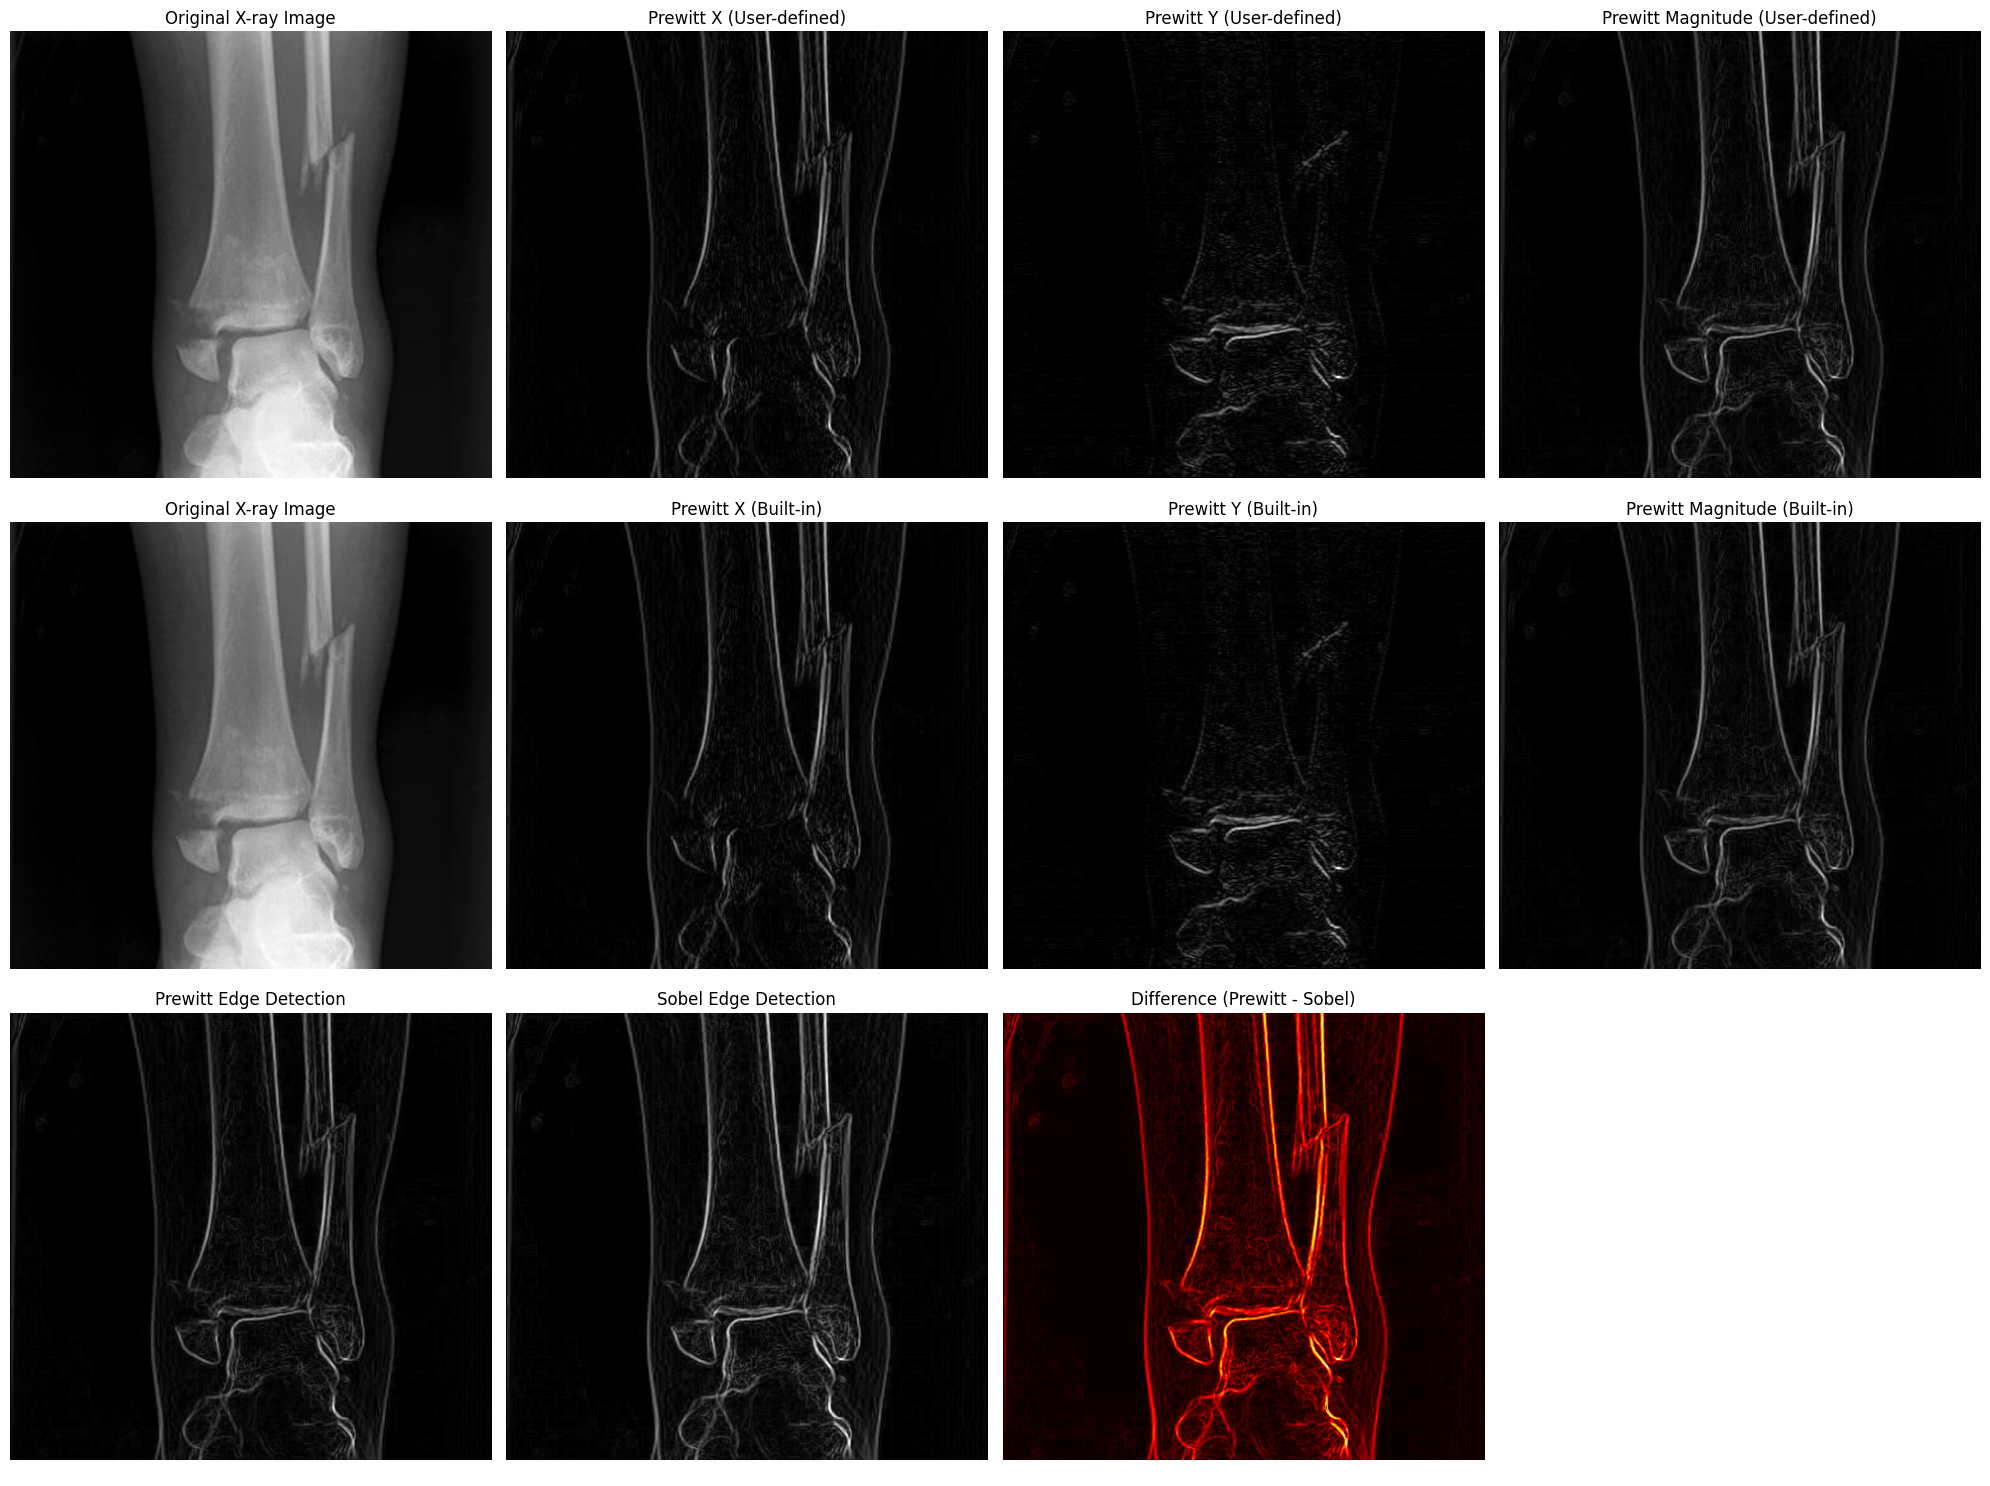

In [5]:
# Display Prewitt results and comparison with Sobel
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Original X-ray image
axes[0, 0].imshow(xray_img, cmap='gray')
axes[0, 0].set_title('Original X-ray Image')
axes[0, 0].axis('off')

# User-defined Prewitt results
axes[0, 1].imshow(np.abs(prewitt_x_user), cmap='gray')
axes[0, 1].set_title('Prewitt X (User-defined)')
axes[0, 1].axis('off')

axes[0, 2].imshow(np.abs(prewitt_y_user), cmap='gray')
axes[0, 2].set_title('Prewitt Y (User-defined)')
axes[0, 2].axis('off')

axes[0, 3].imshow(prewitt_mag_user, cmap='gray')
axes[0, 3].set_title('Prewitt Magnitude (User-defined)')
axes[0, 3].axis('off')

# Built-in Prewitt results
axes[1, 0].imshow(xray_img, cmap='gray')
axes[1, 0].set_title('Original X-ray Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(np.abs(prewitt_x_builtin), cmap='gray')
axes[1, 1].set_title('Prewitt X (Built-in)')
axes[1, 1].axis('off')

axes[1, 2].imshow(np.abs(prewitt_y_builtin), cmap='gray')
axes[1, 2].set_title('Prewitt Y (Built-in)')
axes[1, 2].axis('off')

axes[1, 3].imshow(prewitt_mag_builtin, cmap='gray')
axes[1, 3].set_title('Prewitt Magnitude (Built-in)')
axes[1, 3].axis('off')

# Comparison with Sobel on X-ray
sobel_x_xray = cv2.Sobel(xray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_xray = cv2.Sobel(xray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag_xray = np.sqrt(sobel_x_xray**2 + sobel_y_xray**2)
sobel_mag_xray = np.clip(sobel_mag_xray, 0, 255).astype(np.uint8)

axes[2, 0].imshow(prewitt_mag_user, cmap='gray')
axes[2, 0].set_title('Prewitt Edge Detection')
axes[2, 0].axis('off')

axes[2, 1].imshow(sobel_mag_xray, cmap='gray')
axes[2, 1].set_title('Sobel Edge Detection')
axes[2, 1].axis('off')

# Difference between Prewitt and Sobel
diff = np.abs(prewitt_mag_user.astype(float) - sobel_mag_xray.astype(float))
axes[2, 2].imshow(diff, cmap='hot')
axes[2, 2].set_title('Difference (Prewitt - Sobel)')
axes[2, 2].axis('off')

axes[2, 3].axis('off')

plt.tight_layout()
plt.show()

## 3. Roberts Operator on Satellite Urban Landscape


In [7]:
# Load satellite image
satellite_img = cv2.imread('img/3.jpg', cv2.IMREAD_GRAYSCALE)

# User-defined Roberts function
def roberts_edge_detection(image):
    """
    User-defined Roberts edge detection function
    """
    # Roberts kernels
    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])
    
    # Apply convolution
    grad_x = cv2.filter2D(image, cv2.CV_64F, roberts_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, roberts_y)
    
    # Calculate magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return grad_x, grad_y, magnitude

# Apply user-defined Roberts
roberts_x_user, roberts_y_user, roberts_mag_user = roberts_edge_detection(satellite_img)

# Built-in Roberts using scipy.ndimage.convolve
from scipy.ndimage import convolve
roberts_cross_v = np.array([[1, 0], [0, -1]], dtype=float)
roberts_cross_h = np.array([[0, 1], [-1, 0]], dtype=float)
vertical = convolve(satellite_img.astype(float), roberts_cross_v)
horizontal = convolve(satellite_img.astype(float), roberts_cross_h)
roberts_builtin = np.sqrt(vertical**2 + horizontal**2)
roberts_builtin = np.clip(roberts_builtin, 0, 255).astype(np.uint8)

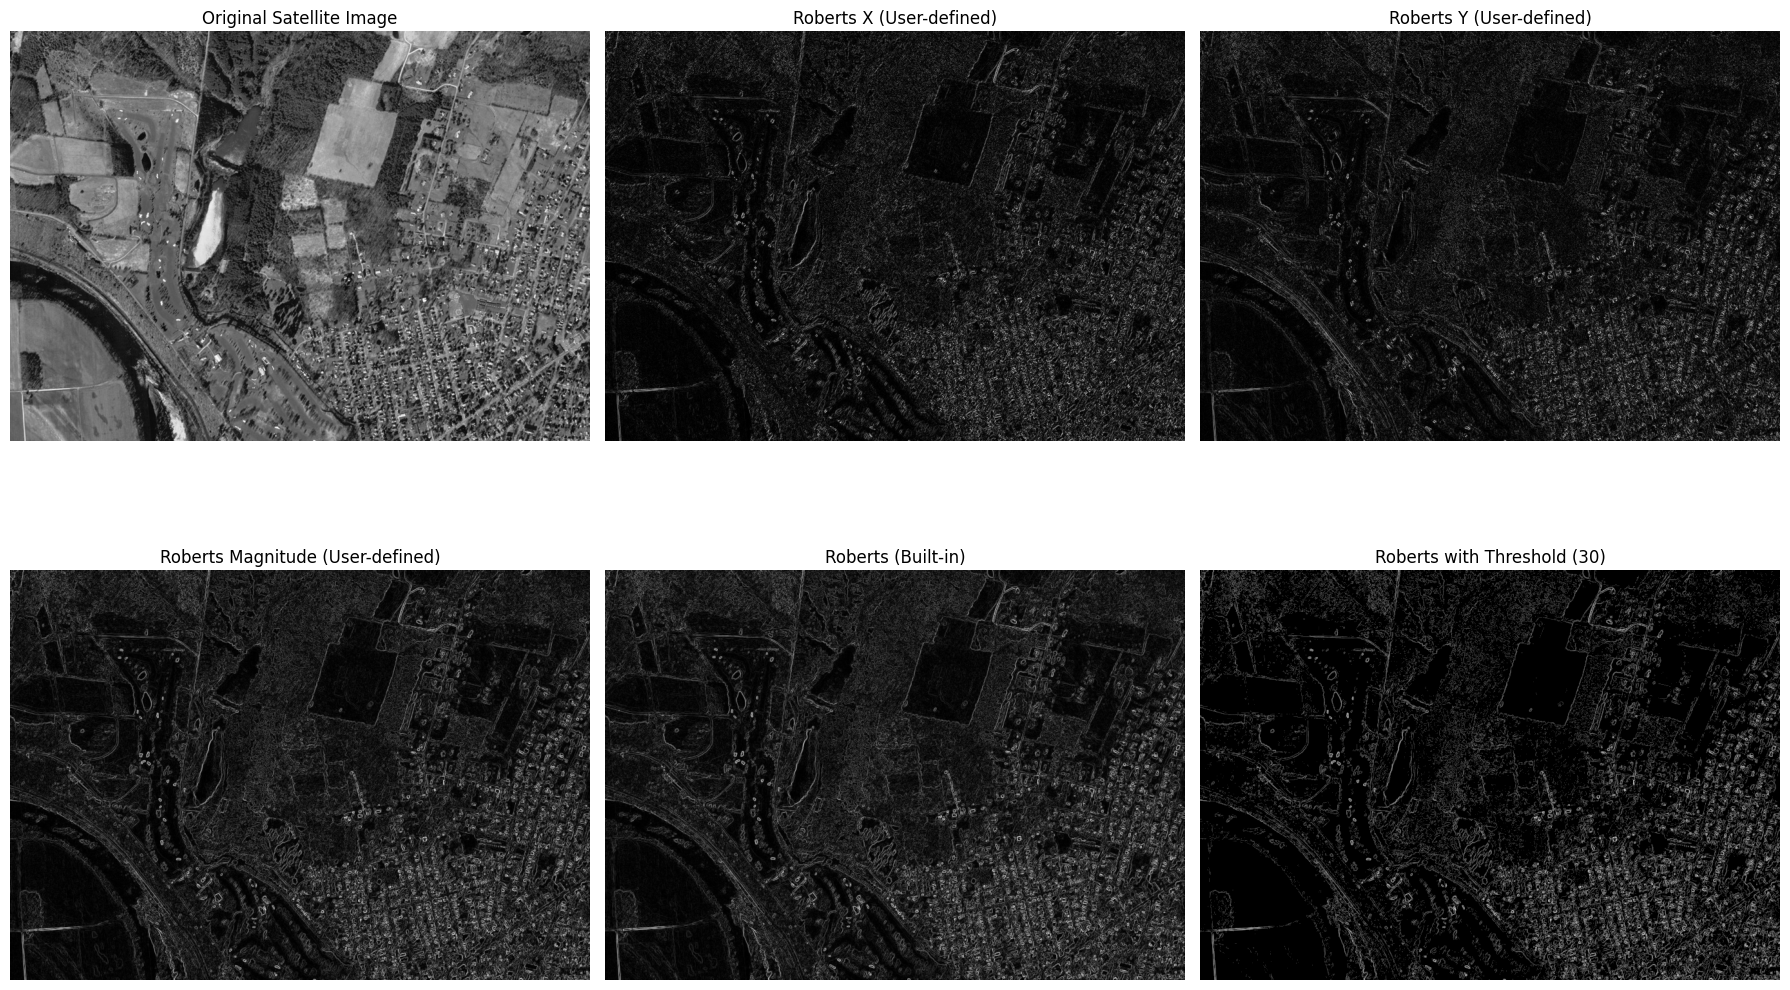

In [8]:
# Display Roberts results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original satellite image
axes[0, 0].imshow(satellite_img, cmap='gray')
axes[0, 0].set_title('Original Satellite Image')
axes[0, 0].axis('off')

# User-defined Roberts results
axes[0, 1].imshow(np.abs(roberts_x_user), cmap='gray')
axes[0, 1].set_title('Roberts X (User-defined)')
axes[0, 1].axis('off')

axes[0, 2].imshow(np.abs(roberts_y_user), cmap='gray')
axes[0, 2].set_title('Roberts Y (User-defined)')
axes[0, 2].axis('off')

axes[1, 0].imshow(roberts_mag_user, cmap='gray')
axes[1, 0].set_title('Roberts Magnitude (User-defined)')
axes[1, 0].axis('off')

axes[1, 1].imshow(roberts_builtin, cmap='gray')
axes[1, 1].set_title('Roberts (Built-in)')
axes[1, 1].axis('off')

# Apply threshold to reduce noise
threshold = 30
roberts_thresh = np.where(roberts_mag_user > threshold, roberts_mag_user, 0)
axes[1, 2].imshow(roberts_thresh, cmap='gray')
axes[1, 2].set_title(f'Roberts with Threshold ({threshold})')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 4. Laplacian Operator on Surveillance Camera Image


In [9]:
# Load surveillance camera image
surveillance_img = cv2.imread('img/4.webp', cv2.IMREAD_GRAYSCALE)

# User-defined Laplacian function
def laplacian_edge_detection(image):
    """
    User-defined Laplacian edge detection function
    """
    # Laplacian kernel (4-connectivity)
    laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    
    # Alternative 8-connectivity kernel
    # laplacian_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    
    # Apply convolution
    laplacian = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel)
    
    # Take absolute value and clip
    laplacian_abs = np.abs(laplacian)
    laplacian_abs = np.clip(laplacian_abs, 0, 255).astype(np.uint8)
    
    return laplacian, laplacian_abs

# Apply user-defined Laplacian
laplacian_user, laplacian_abs_user = laplacian_edge_detection(surveillance_img)

# Built-in Laplacian
laplacian_builtin = cv2.Laplacian(surveillance_img, cv2.CV_64F)
laplacian_builtin_abs = np.abs(laplacian_builtin)
laplacian_builtin_abs = np.clip(laplacian_builtin_abs, 0, 255).astype(np.uint8)

# Apply Gaussian blur before Laplacian to reduce noise (LoG - Laplacian of Gaussian)
blurred = cv2.GaussianBlur(surveillance_img, (3, 3), 1)
log_builtin = cv2.Laplacian(blurred, cv2.CV_64F)
log_builtin_abs = np.abs(log_builtin)
log_builtin_abs = np.clip(log_builtin_abs, 0, 255).astype(np.uint8)

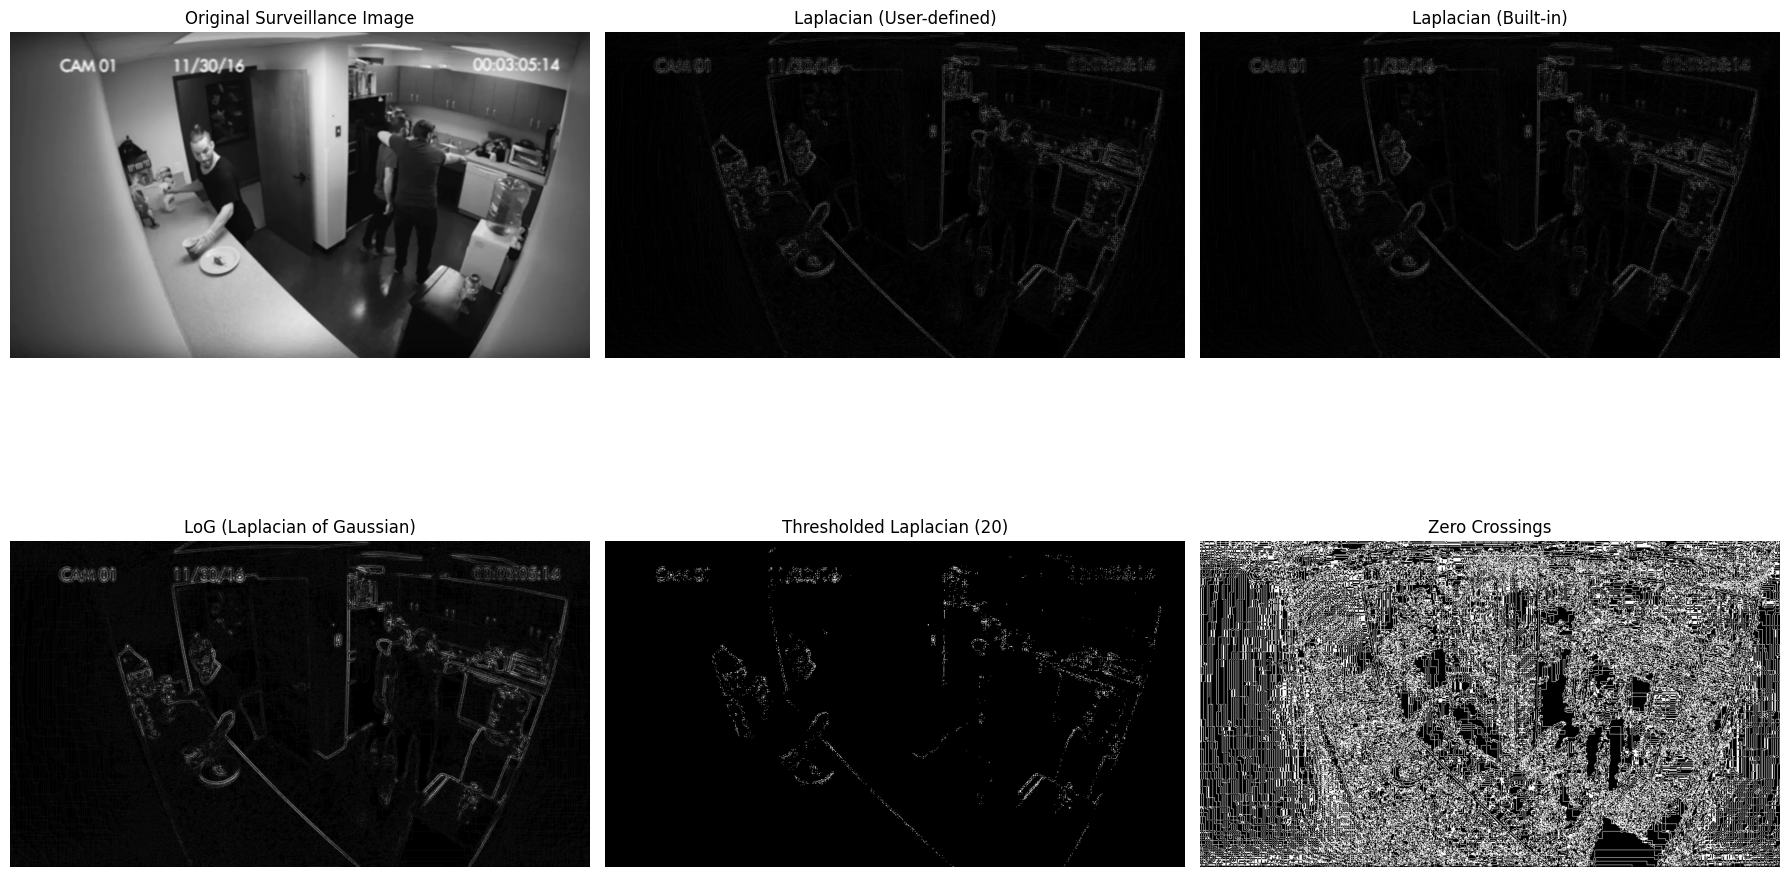

In [10]:
# Display Laplacian results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original surveillance image
axes[0, 0].imshow(surveillance_img, cmap='gray')
axes[0, 0].set_title('Original Surveillance Image')
axes[0, 0].axis('off')

# User-defined Laplacian
axes[0, 1].imshow(laplacian_abs_user, cmap='gray')
axes[0, 1].set_title('Laplacian (User-defined)')
axes[0, 1].axis('off')

# Built-in Laplacian
axes[0, 2].imshow(laplacian_builtin_abs, cmap='gray')
axes[0, 2].set_title('Laplacian (Built-in)')
axes[0, 2].axis('off')

# LoG (Laplacian of Gaussian)
axes[1, 0].imshow(log_builtin_abs, cmap='gray')
axes[1, 0].set_title('LoG (Laplacian of Gaussian)')
axes[1, 0].axis('off')

# Thresholded Laplacian
threshold = 20
laplacian_thresh = np.where(laplacian_builtin_abs > threshold, 255, 0)
axes[1, 1].imshow(laplacian_thresh, cmap='gray')
axes[1, 1].set_title(f'Thresholded Laplacian ({threshold})')
axes[1, 1].axis('off')

# Zero-crossing detection (sign changes)
zero_crossings = np.zeros_like(laplacian_user)
zero_crossings[:-1, :-1] = ((laplacian_user[:-1, :-1] * laplacian_user[1:, :-1] < 0) |
                           (laplacian_user[:-1, :-1] * laplacian_user[:-1, 1:] < 0))
zero_crossings = (zero_crossings * 255).astype(np.uint8)
axes[1, 2].imshow(zero_crossings, cmap='gray')
axes[1, 2].set_title('Zero Crossings')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 5. Canny Edge Detection on MRI Brain Tumor Image

Canny is the most sophisticated edge detection method with multiple steps: Gaussian smoothing, gradient computation, non-maximum suppression, and hysteresis thresholding.

In [11]:
# Load MRI brain image
mri_img = cv2.imread('img/5.jpg', cv2.IMREAD_GRAYSCALE)

# User-defined Canny function
def canny_edge_detection(image, low_threshold=50, high_threshold=150, sigma=1.0):
    """
    User-defined Canny edge detection function
    Steps: 1. Gaussian smoothing, 2. Gradient computation, 3. Non-maximum suppression, 4. Hysteresis thresholding
    """
    
    # Step 1: Gaussian smoothing
    blurred = gaussian_filter(image.astype(float), sigma=sigma)
    
    # Step 2: Gradient computation using Sobel
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    
    # Gradient magnitude and direction
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    direction = np.arctan2(sobel_y, sobel_x) * 180 / np.pi
    direction[direction < 0] += 180
    
    # Step 3: Non-maximum suppression
    suppressed = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            angle = direction[i, j]
            
            # Determine neighbors based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbors = [magnitude[i, j-1], magnitude[i, j+1]]
            elif 22.5 <= angle < 67.5:
                neighbors = [magnitude[i-1, j-1], magnitude[i+1, j+1]]
            elif 67.5 <= angle < 112.5:
                neighbors = [magnitude[i-1, j], magnitude[i+1, j]]
            else:  # 112.5 <= angle < 157.5
                neighbors = [magnitude[i-1, j+1], magnitude[i+1, j-1]]
            
            # Suppress if not local maximum
            if magnitude[i, j] >= max(neighbors):
                suppressed[i, j] = magnitude[i, j]
    
    # Step 4: Hysteresis thresholding
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)
    
    # Connect weak edges to strong edges
    final_edges = strong_edges.copy()
    
    # Simple connectivity (can be improved with proper flood-fill)
    for i in range(1, suppressed.shape[0] - 1):
        for j in range(1, suppressed.shape[1] - 1):
            if weak_edges[i, j]:
                # Check if connected to strong edge in 8-neighborhood
                if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                    final_edges[i, j] = True
    
    return blurred, magnitude, suppressed, final_edges.astype(np.uint8) * 255

# Apply user-defined Canny
blurred, magnitude, suppressed, canny_user = canny_edge_detection(mri_img)

# Built-in Canny
canny_builtin = cv2.Canny(mri_img, 50, 150)

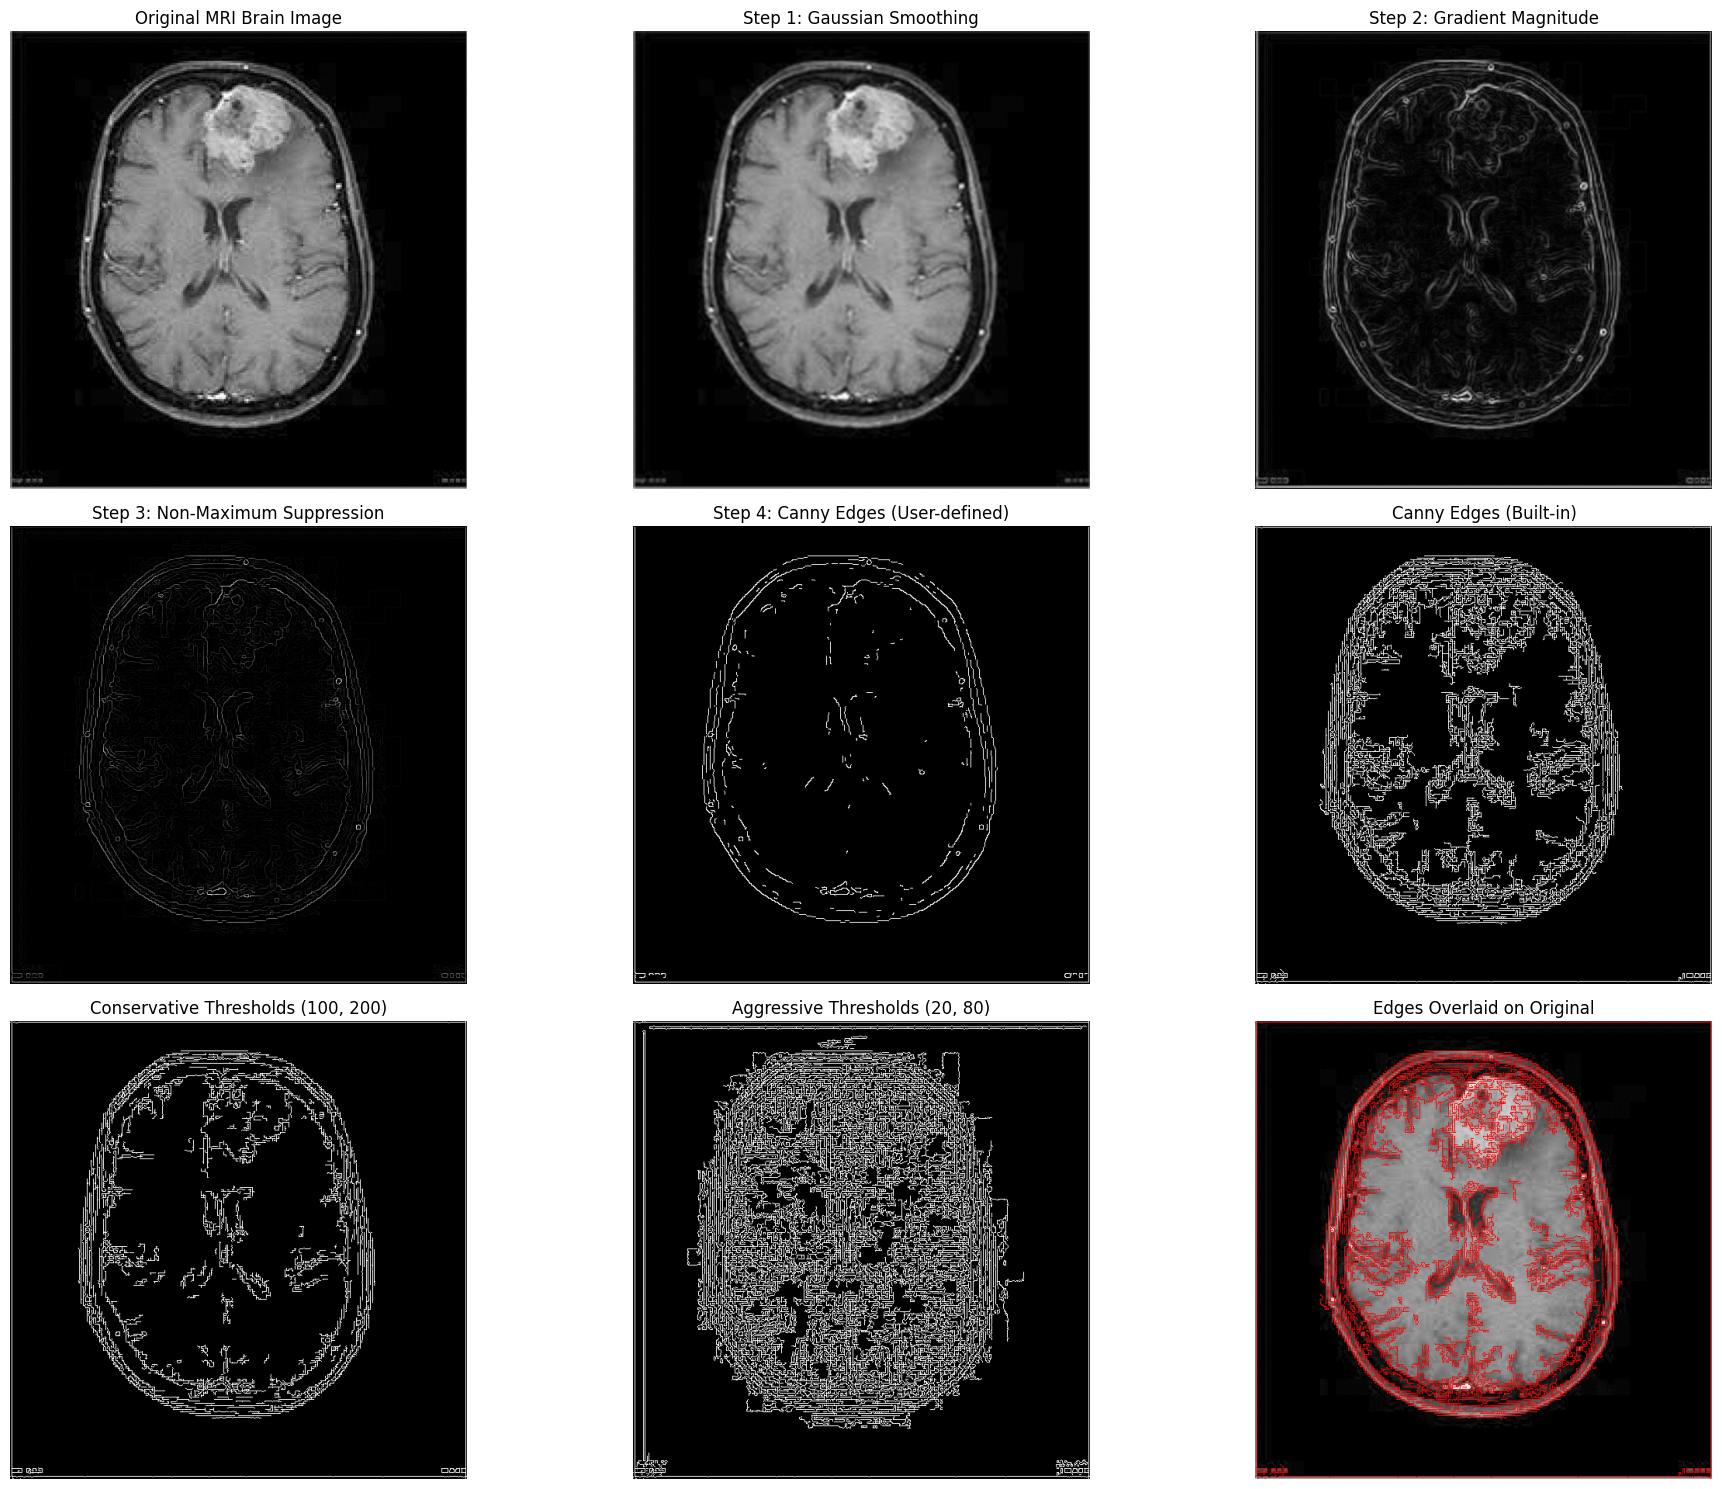

In [12]:
# Display Canny step-by-step process
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Original MRI image
axes[0, 0].imshow(mri_img, cmap='gray')
axes[0, 0].set_title('Original MRI Brain Image')
axes[0, 0].axis('off')

# Step 1: Gaussian smoothing
axes[0, 1].imshow(blurred, cmap='gray')
axes[0, 1].set_title('Step 1: Gaussian Smoothing')
axes[0, 1].axis('off')

# Step 2: Gradient magnitude
axes[0, 2].imshow(magnitude, cmap='gray')
axes[0, 2].set_title('Step 2: Gradient Magnitude')
axes[0, 2].axis('off')

# Step 3: Non-maximum suppression
axes[1, 0].imshow(suppressed, cmap='gray')
axes[1, 0].set_title('Step 3: Non-Maximum Suppression')
axes[1, 0].axis('off')

# Step 4: Final Canny edges (user-defined)
axes[1, 1].imshow(canny_user, cmap='gray')
axes[1, 1].set_title('Step 4: Canny Edges (User-defined)')
axes[1, 1].axis('off')

# Built-in Canny
axes[1, 2].imshow(canny_builtin, cmap='gray')
axes[1, 2].set_title('Canny Edges (Built-in)')
axes[1, 2].axis('off')

# Comparison with different thresholds
canny_conservative = cv2.Canny(mri_img, 100, 200)
canny_aggressive = cv2.Canny(mri_img, 20, 80)

axes[2, 0].imshow(canny_conservative, cmap='gray')
axes[2, 0].set_title('Conservative Thresholds (100, 200)')
axes[2, 0].axis('off')

axes[2, 1].imshow(canny_aggressive, cmap='gray')
axes[2, 1].set_title('Aggressive Thresholds (20, 80)')
axes[2, 1].axis('off')

# Overlay edges on original image
overlay = cv2.cvtColor(mri_img, cv2.COLOR_GRAY2RGB)
overlay[canny_builtin > 0] = [255, 0, 0]  # Red edges
axes[2, 2].imshow(overlay)
axes[2, 2].set_title('Edges Overlaid on Original')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()

## Comparative Analysis of All Edge Detection Methods

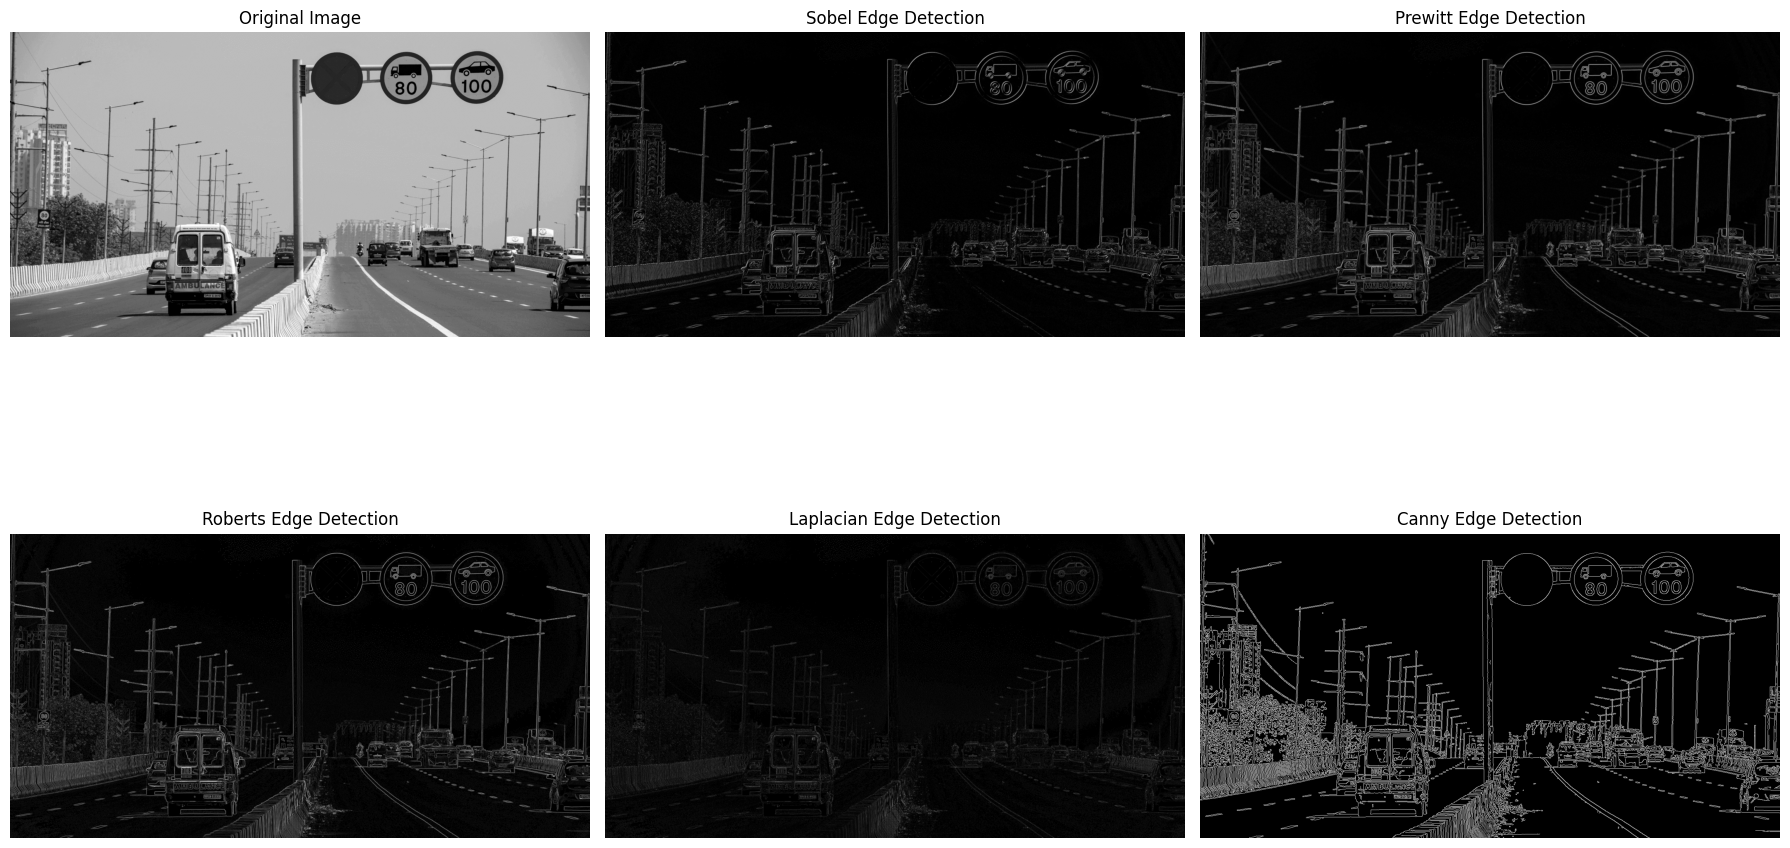

In [14]:
# Apply all methods to a single test image for comparison
test_img = cv2.imread('img/1.png', cv2.IMREAD_GRAYSCALE)

# Apply all methods
sobel_test = cv2.Sobel(test_img, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(test_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_test = np.abs(sobel_test)

prewitt_x_test = cv2.filter2D(test_img, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y_test = cv2.filter2D(test_img, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_test = np.sqrt(prewitt_x_test**2 + prewitt_y_test**2)

# Roberts operator
roberts_cross_v = np.array([[1, 0], [0, -1]], dtype=float)
roberts_cross_h = np.array([[0, 1], [-1, 0]], dtype=float)
roberts_v = convolve(test_img.astype(float), roberts_cross_v)
roberts_h = convolve(test_img.astype(float), roberts_cross_h)
roberts_test = np.sqrt(roberts_v**2 + roberts_h**2)

laplacian_test = np.abs(cv2.Laplacian(test_img, cv2.CV_64F))

canny_test = cv2.Canny(test_img, 50, 150)

# Display comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].imshow(test_img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(sobel_test, cmap='gray')
axes[0, 1].set_title('Sobel Edge Detection')
axes[0, 1].axis('off')

axes[0, 2].imshow(prewitt_test, cmap='gray')
axes[0, 2].set_title('Prewitt Edge Detection')
axes[0, 2].axis('off')

axes[1, 0].imshow(roberts_test, cmap='gray')
axes[1, 0].set_title('Roberts Edge Detection')
axes[1, 0].axis('off')

axes[1, 1].imshow(laplacian_test, cmap='gray')
axes[1, 1].set_title('Laplacian Edge Detection')
axes[1, 1].axis('off')

axes[1, 2].imshow(canny_test, cmap='gray')
axes[1, 2].set_title('Canny Edge Detection')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()